# Setup

In [1]:
import numpy as np
import cv2
import math
import os
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm

# Functions

In [2]:
def create_guassian_filter(sigma):
    size = int(math.floor(8*sigma+1))
    if (size % 2 == 0):
        # Size is even, make odd
        size += 1

    kernel = np.zeros((size, size))

    cum_sum = 0
    x_range = int((size - 1) / 2)
    y_range = int((size - 1) / 2)

    for x in range(-x_range, x_range + 1):
        for y in range(-y_range, y_range + 1):
            kernel[y + y_range][x + x_range] = (math.exp(-((x * x) + (y * y)) / (2 * sigma * sigma))) / (2 * math.pi * sigma * sigma)
            cum_sum += kernel[y + y_range][x + x_range]

    for x in range(-x_range, x_range + 1):
        for y in range(-y_range, y_range + 1):
            kernel[y + y_range][x + x_range] /= cum_sum

    return kernel

In [3]:
def perform_numpy_convolution(image: np.ndarray, template: np.ndarray):
    # Flip the template around both axes
    inverted_template = np.flip(template)
    
    x, y = len(image), len(image[0])
    offset = int((len(template) - 1) / 2)

    print(f'Original Shape: {np.shape(image)}')
    print(f'Transposed Shape: {np.shape(image.transpose((2, 0, 1)))}')
    print(f'Un-Transposed Shape: {np.shape(image.transpose((2, 0, 1)).transpose((1, 2, 0)))}')

    if image.ndim == 2:
        image = np.array(image)
    else:
        image = image.transpose((2, 0, 1))

    # Now image can be looped through
    new_image = np.zeros(shape=np.shape(image)).astype(int)

    for index, color_array in enumerate(image):
        padded_color_array = np.pad(color_array, [offset, offset], mode='constant')
        new_color_array = np.zeros((x, y)).astype(int)
        for row in tqdm(range(0+offset, x+offset)):
            for column in range(0+offset, y+offset):
                section = np.array(padded_color_array[row-offset:row+offset+1,column-offset:column+offset+1])
                new_color_array[row-offset][column-offset] = np.sum(np.multiply(section, inverted_template))

        new_image[index] = new_color_array

    return new_image.transpose((1, 2, 0))

# Generate Guassian Kernel

In [4]:
# Create the guassian kernel
guassian_filter_matrix = create_guassian_filter(sigma=5)

# Low Pass Filtering

In [5]:
# Create the path to the image
IMG_1_PATH = os.path.join(os.path.abspath('../'), 'data', 'dog.bmp')

img_1 = cv2.imread('../../data/dog.bmp') # Read the image file
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)


In [6]:
low_pass_image = perform_numpy_convolution(img_1, guassian_filter_matrix)

Original Shape: (361, 410, 3)
Transposed Shape: (3, 361, 410)
Un-Transposed Shape: (361, 410, 3)


100%|██████████| 361/361 [00:04<00:00, 87.34it/s] 


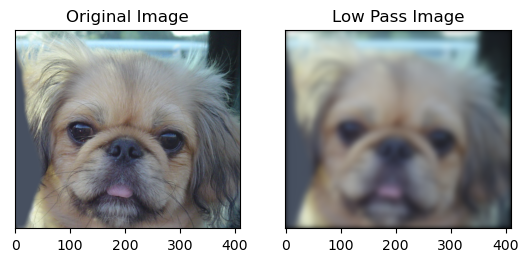

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.title('Original Image')
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(low_pass_image)
plt.title('Low Pass Image')
plt.yticks([])

plt.show()

# High Pass Filtering

In [8]:
# Create the path to the image
IMG_2_PATH = os.path.join(os.path.abspath('../'), 'data', 'cat.bmp')

img_2 = cv2.imread('../../data/cat.bmp') # Read the image file
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

In [15]:
high_pass_image = img_2 - perform_numpy_convolution(img_2, guassian_filter_matrix)

Original Shape: (361, 410, 3)
Transposed Shape: (3, 361, 410)
Un-Transposed Shape: (361, 410, 3)


100%|██████████| 361/361 [00:03<00:00, 110.94it/s]


In [16]:
high_pass_image + 128

array([[[281, 261, 227],
        [264, 238, 201],
        [246, 215, 171],
        ...,
        [266, 248, 233],
        [280, 265, 254],
        [290, 276, 269]],

       [[282, 265, 238],
        [262, 241, 210],
        [242, 213, 179],
        ...,
        [255, 240, 228],
        [270, 259, 248],
        [283, 271, 262]],

       [[282, 267, 247],
        [261, 241, 217],
        [236, 213, 187],
        ...,
        [246, 233, 224],
        [262, 252, 243],
        [277, 266, 256]],

       ...,

       [[126, 126, 129],
        [166, 166, 168],
        [179, 179, 181],
        ...,
        [236, 205, 172],
        [247, 212, 176],
        [260, 224, 183]],

       [[122, 123, 125],
        [157, 159, 160],
        [168, 172, 175],
        ...,
        [244, 209, 174],
        [254, 219, 180],
        [269, 231, 190]],

       [[126, 129, 130],
        [156, 158, 159],
        [169, 171, 175],
        ...,
        [256, 221, 181],
        [266, 231, 189],
        [280, 243, 198]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


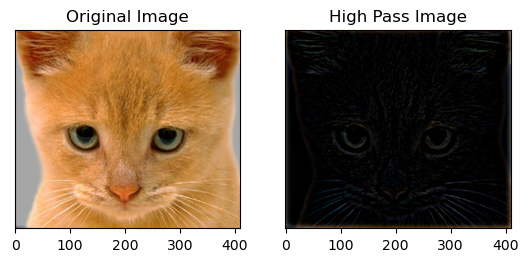

In [18]:
plt.subplot(1, 2, 1)
plt.imshow(img_2)
plt.title('Original Image')
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(high_pass_image)
plt.title('High Pass Image')
plt.yticks([])

plt.show()

# Create hybrid Image

In [11]:
hybrid_image = low_pass_image + high_pass_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

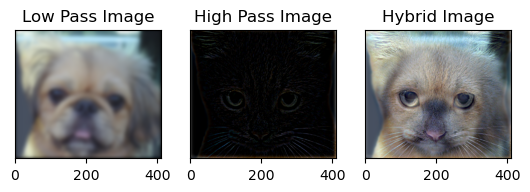

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low Pass Image')
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High Pass Image')
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.yticks([])